# Î≥¥ÌóòÎ£å Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù Ïã§Ïäµ

## 1. ÌîÑÎ°úÏ†ùÌä∏ Í∞úÏöî
- **Î™©Ï†Å**: Î≥¥ÌóòÎ£å(charges) Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìïú ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù ÏàòÌñâ
- **Îç∞Ïù¥ÌÑ∞**: premium.csv (ÎÇòÏù¥, ÏÑ±Î≥Ñ, BMI, ÏûêÎÖÄÏàò, Ìù°Ïó∞Ïó¨Î∂Ä, ÏßÄÏó≠, Î≥¥ÌóòÎ£å)
- **Î∂ÑÏÑù Î∞©Î≤ï**: Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌïú Î≥¥ÌóòÎ£å ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï

In [29]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (matplotlib ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

## 2. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Í∏∞Î≥∏ ÌÉêÏÉâ

In [30]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
df = pd.read_csv('data1/premium.csv')

# Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print("=== Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
print(f"\nÏª¨ÎüºÎ™Ö: {list(df.columns)}")
print("\n=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===")
print(df.dtypes)

=== Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1338, 7)

Ïª¨ÎüºÎ™Ö: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [31]:
# Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
print("=== Îç∞Ïù¥ÌÑ∞ ÏÉÅÏúÑ 5Ìñâ ===")
print(df.head())

print("\n=== Îç∞Ïù¥ÌÑ∞ ÌïòÏúÑ 5Ìñâ ===")
print(df.tail())

=== Îç∞Ïù¥ÌÑ∞ ÏÉÅÏúÑ 5Ìñâ ===
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

=== Îç∞Ïù¥ÌÑ∞ ÌïòÏúÑ 5Ìñâ ===
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [32]:
# Í∏∞Ïà†ÌÜµÍ≥Ñ ÌôïÏù∏
print("=== ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ïà†ÌÜµÍ≥Ñ ===")
print(df.describe())

print("\n=== Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ ===")
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col} Î∂ÑÌè¨:")
    print(df[col].value_counts())

=== ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ïà†ÌÜµÍ≥Ñ ===
               age          bmi     children       charges
count  1338.000000  1333.000000  1338.000000   1338.000000
mean     39.207025    30.658545     1.094918  13270.422265
std      14.049960     6.092785     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.315000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.675000     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

=== Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ ===

sex Î∂ÑÌè¨:
sex
male      676
female    662
Name: count, dtype: int64

smoker Î∂ÑÌè¨:
smoker
no     1064
yes     274
Name: count, dtype: int64

region Î∂ÑÌè¨:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [33]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("=== Í≤∞Ï∏°Ïπò ÌôïÏù∏ ===")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nÏ†ÑÏ≤¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: {missing_values.sum()}")

# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
print(f"\nÏ§ëÎ≥µÎêú ÌñâÏùò Í∞úÏàò: {df.duplicated().sum()}")

=== Í≤∞Ï∏°Ïπò ÌôïÏù∏ ===
age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 5

Ï§ëÎ≥µÎêú ÌñâÏùò Í∞úÏàò: 1


## 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî

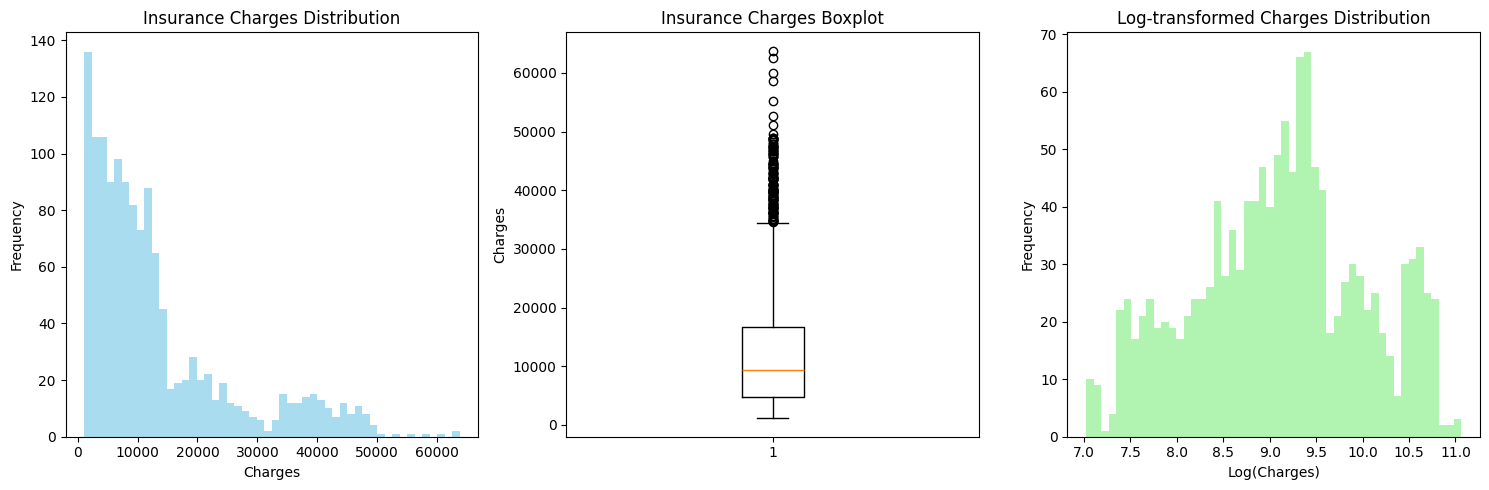

Î≥¥ÌóòÎ£å ÌÜµÍ≥Ñ:
ÌèâÍ∑†: $13270.42
Ï§ëÏïôÍ∞í: $9382.03
ÏµúÏÜüÍ∞í: $1121.87
ÏµúÎåìÍ∞í: $63770.43


In [34]:
# ÌÉÄÍ≤ü Î≥ÄÏàò(charges) Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(15, 5))

# Î≥¥ÌóòÎ£å ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.subplot(1, 3, 1)
plt.hist(df['charges'], bins=50, alpha=0.7, color='skyblue')
plt.title('Insurance Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Î≥¥ÌóòÎ£å Î∞ïÏä§ÌîåÎ°Ø
plt.subplot(1, 3, 2)
plt.boxplot(df['charges'])
plt.title('Insurance Charges Boxplot')
plt.ylabel('Charges')

# Î°úÍ∑∏ Î≥ÄÌôòÎêú Î≥¥ÌóòÎ£å Î∂ÑÌè¨
plt.subplot(1, 3, 3)
plt.hist(np.log(df['charges']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Log-transformed Charges Distribution')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Î≥¥ÌóòÎ£å ÌÜµÍ≥Ñ:")
print(f"ÌèâÍ∑†: ${df['charges'].mean():.2f}")
print(f"Ï§ëÏïôÍ∞í: ${df['charges'].median():.2f}")
print(f"ÏµúÏÜüÍ∞í: ${df['charges'].min():.2f}")
print(f"ÏµúÎåìÍ∞í: ${df['charges'].max():.2f}")

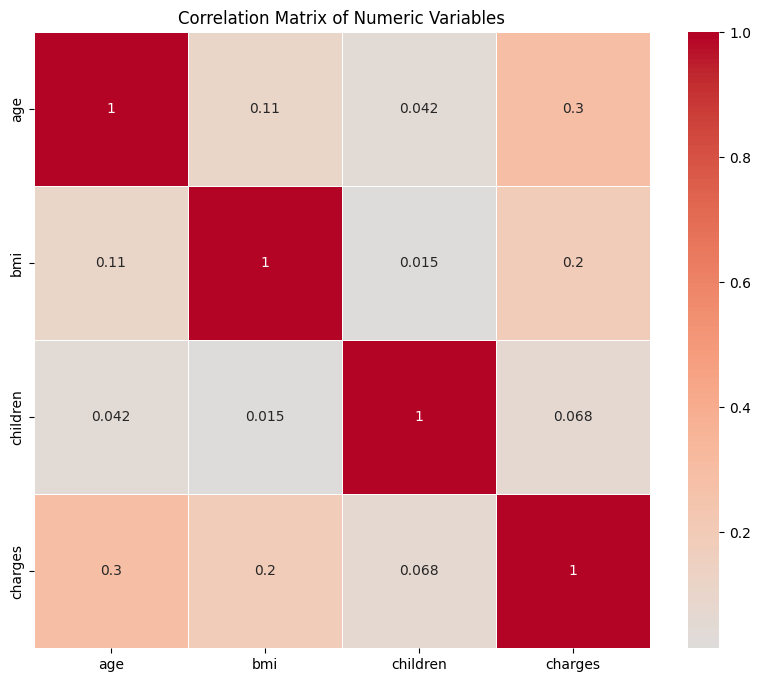


=== chargesÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ===
charges     1.000000
age         0.299008
bmi         0.195222
children    0.067998
Name: charges, dtype: float64


In [35]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

print("\n=== chargesÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ===")
correlations = df[numeric_cols].corr()['charges'].sort_values(ascending=False)
print(correlations)

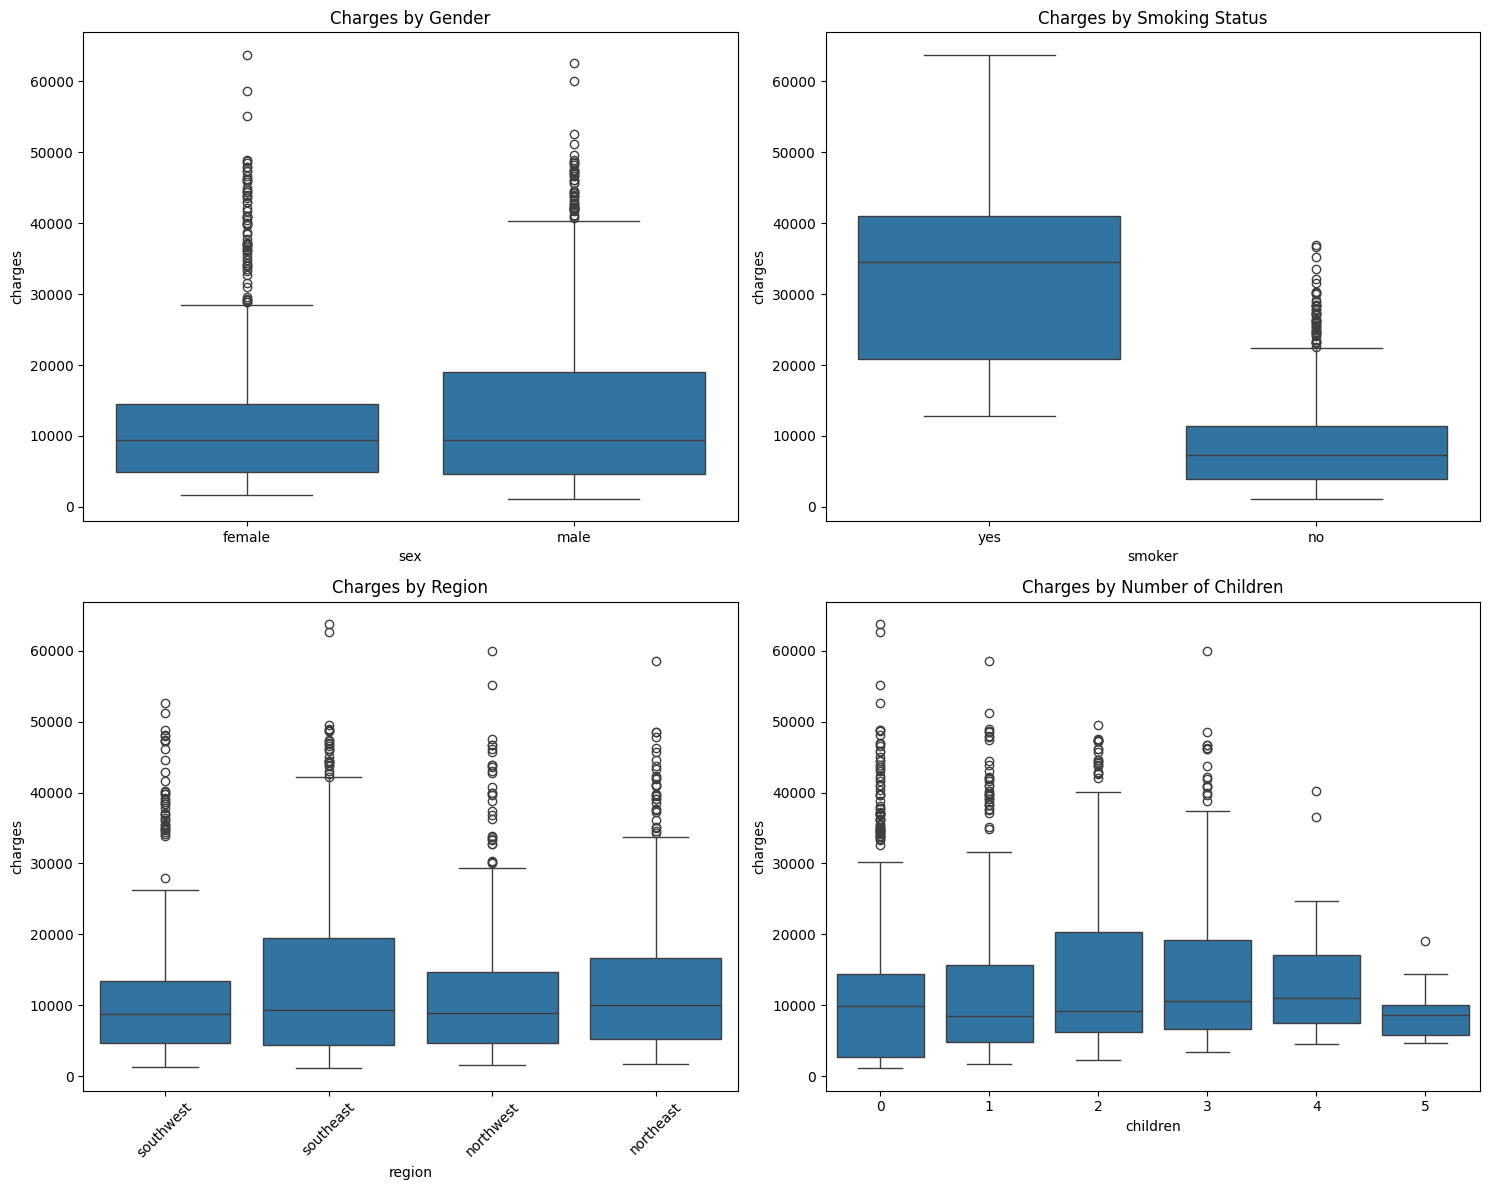

In [36]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ Î≥¥ÌóòÎ£å Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ÏÑ±Î≥ÑÏóê Îî∞Î•∏ Î≥¥ÌóòÎ£å
sns.boxplot(data=df, x='sex', y='charges', ax=axes[0,0])
axes[0,0].set_title('Charges by Gender')

# Ìù°Ïó∞ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Î≥¥ÌóòÎ£å
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0,1])
axes[0,1].set_title('Charges by Smoking Status')

# ÏßÄÏó≠Î≥Ñ Î≥¥ÌóòÎ£å
sns.boxplot(data=df, x='region', y='charges', ax=axes[1,0])
axes[1,0].set_title('Charges by Region')
axes[1,0].tick_params(axis='x', rotation=45)

# ÏûêÎÖÄÏàòÏóê Îî∞Î•∏ Î≥¥ÌóòÎ£å
sns.boxplot(data=df, x='children', y='charges', ax=axes[1,1])
axes[1,1].set_title('Charges by Number of Children')

plt.tight_layout()
plt.show()

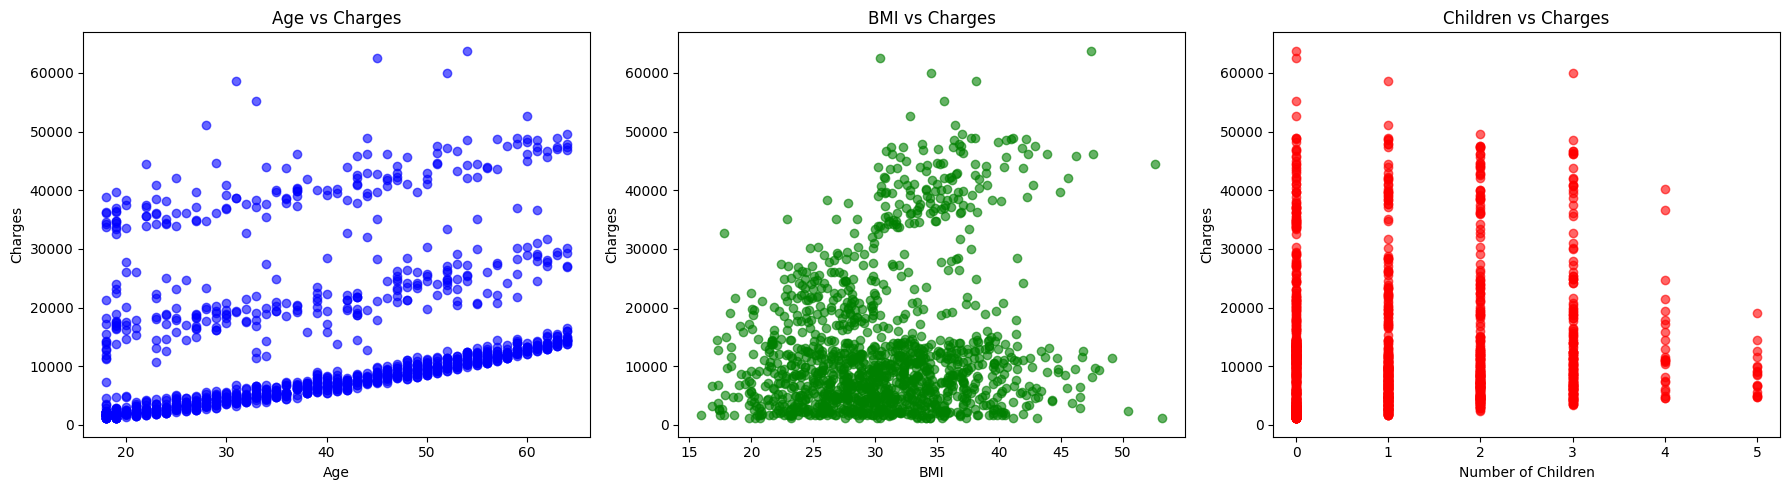

In [37]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎì§Í≥º Î≥¥ÌóòÎ£å Í∞ÑÏùò ÏÇ∞Ï†êÎèÑ
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ÎÇòÏù¥ÏôÄ Î≥¥ÌóòÎ£å
axes[0].scatter(df['age'], df['charges'], alpha=0.6, color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')
axes[0].set_title('Age vs Charges')

# BMIÏôÄ Î≥¥ÌóòÎ£å
axes[1].scatter(df['bmi'], df['charges'], alpha=0.6, color='green')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')
axes[1].set_title('BMI vs Charges')

# ÏûêÎÖÄÏàòÏôÄ Î≥¥ÌóòÎ£å
axes[2].scatter(df['children'], df['charges'], alpha=0.6, color='red')
axes[2].set_xlabel('Number of Children')
axes[2].set_ylabel('Charges')
axes[2].set_title('Children vs Charges')

plt.tight_layout()
plt.show()

In [38]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî© (Label Encoding)
df_encoded = df.copy()

# Label Encoder ÏÉùÏÑ± Î∞è Ï†ÅÏö©
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']

for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
    
    # Ïù∏ÏΩîÎî© Îß§Ìïë Ï†ïÎ≥¥ Ï∂úÎ†•
    print(f"\n{column} Ïù∏ÏΩîÎî© Îß§Ìïë:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

print("\n=== Ïù∏ÏΩîÎî© ÌõÑ Îç∞Ïù¥ÌÑ∞ ===")
print(df_encoded.head())


sex Ïù∏ÏΩîÎî© Îß§Ìïë:
  female -> 0
  male -> 1

smoker Ïù∏ÏΩîÎî© Îß§Ìïë:
  no -> 0
  yes -> 1

region Ïù∏ÏΩîÎî© Îß§Ìïë:
  northeast -> 0
  northwest -> 1
  southeast -> 2
  southwest -> 3

=== Ïù∏ÏΩîÎî© ÌõÑ Îç∞Ïù¥ÌÑ∞ ===
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


## 4. ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌèâÍ∞Ä

## 7. Ï†ïÍ∑úÌôî ÌöåÍ∑ÄÎ™®Îç∏ (Ridge, Lasso) Ï∂îÍ∞Ä Î∂ÑÏÑù

In [39]:
# C:\githome\9-11week_py_statistics\39_3_Î≥¥ÌóòÎ£åÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑùÏã§Ïäµ.ipynb
# Ridge ÌöåÍ∑Ä Î∞è LassoCVÎ•º ÏúÑÌïú Ï∂îÍ∞Ä ÎùºÏù¥Î∏åÎü¨Î¶¨ import
from sklearn.linear_model import Ridge, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler  # Ï†ïÍ∑úÌôîÎ•º ÏúÑÌïú Ïä§ÏºÄÏùºÎü¨
import matplotlib.pyplot as plt
import numpy as np

print("Ï†ïÍ∑úÌôî ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å")

Ï†ïÍ∑úÌôî ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å


In [40]:
# ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ (Ï†ïÍ∑úÌôî ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏúÑÌï¥ ÌïÑÏöî)
# RidgeÏôÄ LassoÎäî Ï†ïÍ∑úÌôî Ìï≠ÏùÑ ÏÇ¨Ïö©ÌïòÎØÄÎ°ú ÌäπÏÑ±Îì§Ïùò Ïä§ÏºÄÏùºÏù¥ Ï§ëÏöîÌï®
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú Ïä§ÏºÄÏùºÎü¨ ÌïôÏäµ Î∞è Î≥ÄÌôò
X_test_scaled = scaler.transform(X_test)        # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò (fitÏùÄ ÌïòÏßÄ ÏïäÏùå)

print("=== ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å ===")
print(f"Ïä§ÏºÄÏùºÎßÅ Ï†Ñ X_train ÌèâÍ∑†: {X_train.mean(axis=0).round(2).values}")
print(f"Ïä§ÏºÄÏùºÎßÅ ÌõÑ X_train ÌèâÍ∑†: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Ïä§ÏºÄÏùºÎßÅ Ï†Ñ X_train ÌëúÏ§ÄÌé∏Ï∞®: {X_train.std(axis=0).round(2).values}")
print(f"Ïä§ÏºÄÏùºÎßÅ ÌõÑ X_train ÌëúÏ§ÄÌé∏Ï∞®: {X_train_scaled.std(axis=0).round(2)}")

=== ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å ===
Ïä§ÏºÄÏùºÎßÅ Ï†Ñ X_train ÌèâÍ∑†: [39.36  0.51 30.55  1.11  0.21  1.51]
Ïä§ÏºÄÏùºÎßÅ ÌõÑ X_train ÌèâÍ∑†: [-0. -0. -0. -0.  0. -0.]
Ïä§ÏºÄÏùºÎßÅ Ï†Ñ X_train ÌëúÏ§ÄÌé∏Ï∞®: [14.07  0.5   6.02  1.22  0.4   1.12]
Ïä§ÏºÄÏùºÎßÅ ÌõÑ X_train ÌëúÏ§ÄÌé∏Ï∞®: [1. 1. 1. 1. 1. 1.]


In [41]:
# Ridge ÌöåÍ∑Ä Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌõàÎ†®
# Ridge ÌöåÍ∑ÄÎäî L2 Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï®
ridge_model = Ridge(alpha=1.0, random_state=42)  # alphaÎäî Ï†ïÍ∑úÌôî Í∞ïÎèÑ Ï°∞Ï†à ÌååÎùºÎØ∏ÌÑ∞
ridge_model.fit(X_train_scaled, y_train)

# Ridge ÌöåÍ∑Ä ÏòàÏ∏°
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

print("=== Ridge ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å ===")
print(f"Ridge Ï†àÌé∏(Intercept): {ridge_model.intercept_:.2f}")
print("\n=== Ridge ÌöåÍ∑ÄÍ≥ÑÏàò(Coefficients) ===")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"{feature}: {coef:.2f}")

# Ridge ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä
print("\n=== Ridge ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä ===")
ridge_train_metrics = evaluate_model(y_train, y_train_pred_ridge, "Ridge ÌõàÎ†® Îç∞Ïù¥ÌÑ∞")
ridge_test_metrics = evaluate_model(y_test, y_test_pred_ridge, "Ridge ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞")

=== Ridge ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å ===
Ridge Ï†àÌé∏(Intercept): 13346.09

=== Ridge ÌöåÍ∑ÄÍ≥ÑÏàò(Coefficients) ===
age: 3619.68
sex: -0.39
bmi: 1971.49
children: 511.09
smoker: 9552.06
region: -285.88

=== Ridge ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä ===

=== Ridge ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä ===
R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò): 0.7403
MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®): 37487597.67
RMSE (ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®): 6122.71
MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): 4208.91

=== Ridge ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä ===
R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò): 0.7833
MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®): 33647505.20
RMSE (ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®): 5800.65
MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): 4174.24


In [42]:
# LassoCV ÌöåÍ∑Ä Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌõàÎ†®
# LassoCVÎäî ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ ÏµúÏ†ÅÏùò alpha Í∞íÏùÑ ÏûêÎèôÏúºÎ°ú Ï∞æÏùå
# LassoÎäî L1 Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ ÌäπÏÑ±Ïùò Í≥ÑÏàòÎ•º 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ ÌäπÏÑ± ÏÑ†ÌÉù Ìö®Í≥ºÎ•º Í∞ÄÏßê
lasso_model = LassoCV(cv=5, random_state=42, max_iter=1000)  # 5-fold ÍµêÏ∞®Í≤ÄÏ¶ù ÏÇ¨Ïö©
lasso_model.fit(X_train_scaled, y_train)

# LassoCV ÏòàÏ∏°
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

print("=== LassoCV ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å ===")
print(f"LassoCV ÏµúÏ†Å alpha: {lasso_model.alpha_:.6f}")
print(f"LassoCV Ï†àÌé∏(Intercept): {lasso_model.intercept_:.2f}")
print("\n=== LassoCV ÌöåÍ∑ÄÍ≥ÑÏàò(Coefficients) ===")
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(f"{feature}: {coef:.2f}")

# 0Ïù¥ Îêú ÌäπÏÑ±Îì§ ÌôïÏù∏ (ÌäπÏÑ± ÏÑ†ÌÉù Ìö®Í≥º)
zero_coef_features = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if abs(coef) < 1e-6]
if zero_coef_features:
    print(f"\nÏ†úÍ±∞Îêú ÌäπÏÑ±Îì§ (Í≥ÑÏàòÍ∞Ä 0Ïóê Í∞ÄÍπåÏö¥ ÌäπÏÑ±): {zero_coef_features}")
else:
    print("\nÎ™®Îì† ÌäπÏÑ±Ïù¥ Î™®Îç∏Ïóê ÏÇ¨Ïö©ÎêòÏóàÏäµÎãàÎã§.")

# LassoCV ÏÑ±Îä• ÌèâÍ∞Ä
print("\n=== LassoCV ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä ===")
lasso_train_metrics = evaluate_model(y_train, y_train_pred_lasso, "LassoCV ÌõàÎ†® Îç∞Ïù¥ÌÑ∞")
lasso_test_metrics = evaluate_model(y_test, y_test_pred_lasso, "LassoCV ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞")

=== LassoCV ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å ===
LassoCV ÏµúÏ†Å alpha: 87.399738
LassoCV Ï†àÌé∏(Intercept): 13346.09

=== LassoCV ÌöåÍ∑ÄÍ≥ÑÏàò(Coefficients) ===
age: 3545.55
sex: 0.00
bmi: 1877.58
children: 430.58
smoker: 9471.33
region: -183.83

Ï†úÍ±∞Îêú ÌäπÏÑ±Îì§ (Í≥ÑÏàòÍ∞Ä 0Ïóê Í∞ÄÍπåÏö¥ ÌäπÏÑ±): ['sex']

=== LassoCV ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä ===

=== LassoCV ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä ===
R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò): 0.7400
MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®): 37526500.28
RMSE (ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®): 6125.89
MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): 4203.79

=== LassoCV ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä ===
R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò): 0.7819
MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®): 33864628.32
RMSE (ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®): 5819.33
MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): 4181.20


In [43]:
# Î™®Îì† Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµêÌëú ÏÉùÏÑ±
# ÏÑ†ÌòïÌöåÍ∑Ä, Ridge, LassoCV Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌïòÏó¨ ÌëúÎ°ú Ï†ïÎ¶¨
import pandas as pd

model_comparison = pd.DataFrame({
    'Î™®Îç∏': ['Linear Regression', 'Ridge', 'LassoCV'],
    'ÌõàÎ†® R¬≤': [train_metrics[0], ridge_train_metrics[0], lasso_train_metrics[0]],
    'ÌÖåÏä§Ìä∏ R¬≤': [test_metrics[0], ridge_test_metrics[0], lasso_test_metrics[0]],
    'ÌõàÎ†® RMSE': [train_metrics[2], ridge_train_metrics[2], lasso_train_metrics[2]],
    'ÌÖåÏä§Ìä∏ RMSE': [test_metrics[2], ridge_test_metrics[2], lasso_test_metrics[2]],
    'ÌõàÎ†® MAE': [train_metrics[3], ridge_train_metrics[3], lasso_train_metrics[3]],
    'ÌÖåÏä§Ìä∏ MAE': [test_metrics[3], ridge_test_metrics[3], lasso_test_metrics[3]]
})

print("=== Î™®Îì† Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ===")
print(model_comparison.round(4))

# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Î™®Îç∏ Ï∞æÍ∏∞
best_model_idx = model_comparison['ÌÖåÏä§Ìä∏ R¬≤'].idxmax()
best_model_name = model_comparison.loc[best_model_idx, 'Î™®Îç∏']
best_r2_score = model_comparison.loc[best_model_idx, 'ÌÖåÏä§Ìä∏ R¬≤']

print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name} (ÌÖåÏä§Ìä∏ R¬≤ = {best_r2_score:.4f})")

=== Î™®Îì† Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ===
                  Î™®Îç∏   ÌõàÎ†® R¬≤  ÌÖåÏä§Ìä∏ R¬≤    ÌõàÎ†® RMSE   ÌÖåÏä§Ìä∏ RMSE     ÌõàÎ†® MAE  \
0  Linear Regression  0.7403  0.7833  6122.7037  5800.0734  4207.7204   
1              Ridge  0.7403  0.7833  6122.7116  5800.6470  4208.9142   
2            LassoCV  0.7400  0.7819  6125.8877  5819.3323  4203.7888   

     ÌÖåÏä§Ìä∏ MAE  
0  4172.7439  
1  4174.2404  
2  4181.2043  

üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Linear Regression (ÌÖåÏä§Ìä∏ R¬≤ = 0.7833)


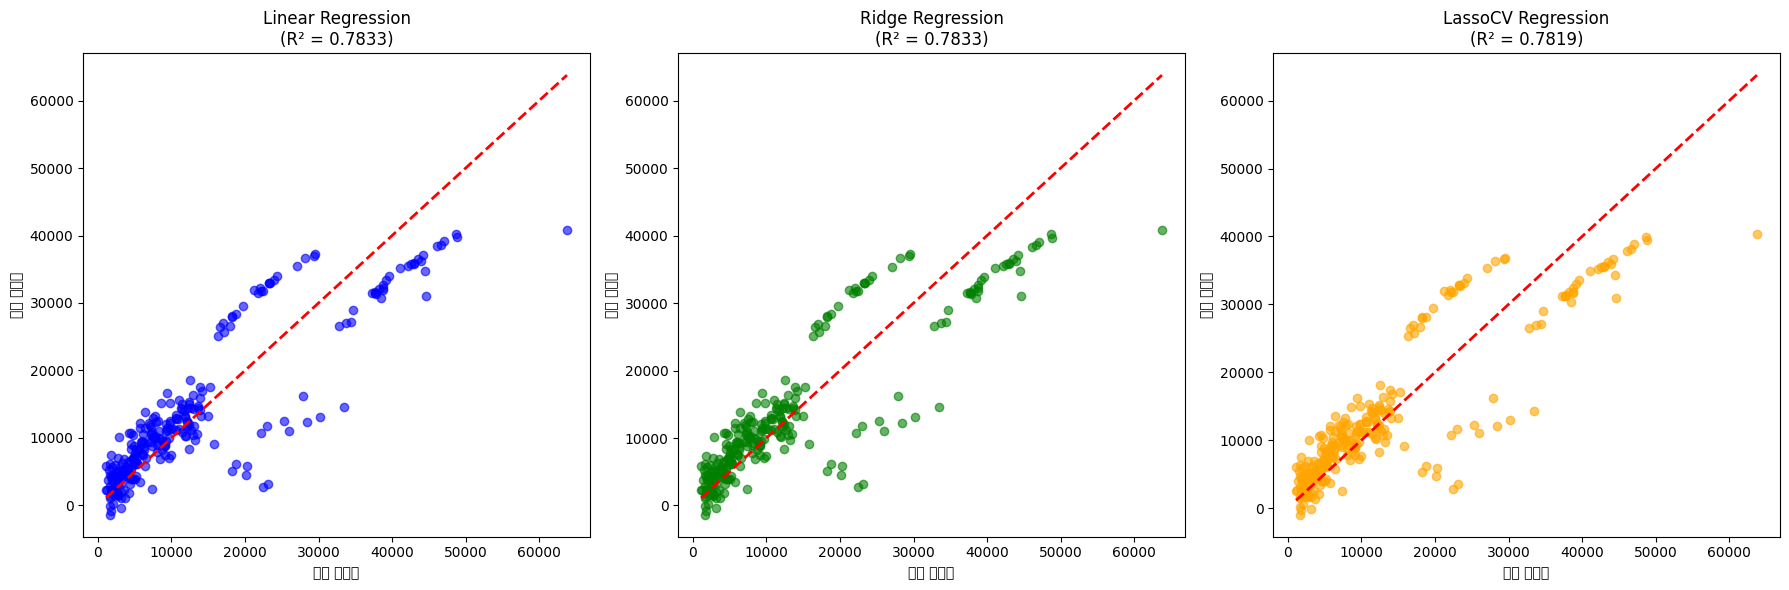

In [44]:
# Î™®Îç∏Î≥Ñ ÏòàÏ∏°Í∞í ÎπÑÍµê ÏãúÍ∞ÅÌôî
# ÏÑ∏ Î™®Îç∏Ïùò Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞íÏùÑ Ìïú ÌôîÎ©¥ÏóêÏÑú ÎπÑÍµê
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏
axes[0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Ïã§Ï†ú Î≥¥ÌóòÎ£å')
axes[0].set_ylabel('ÏòàÏ∏° Î≥¥ÌóòÎ£å')
axes[0].set_title(f'Linear Regression\n(R¬≤ = {test_metrics[0]:.4f})')

# Ridge ÌöåÍ∑Ä Î™®Îç∏
axes[1].scatter(y_test, y_test_pred_ridge, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Ïã§Ï†ú Î≥¥ÌóòÎ£å')
axes[1].set_ylabel('ÏòàÏ∏° Î≥¥ÌóòÎ£å')
axes[1].set_title(f'Ridge Regression\n(R¬≤ = {ridge_test_metrics[0]:.4f})')

# LassoCV Î™®Îç∏
axes[2].scatter(y_test, y_test_pred_lasso, alpha=0.6, color='orange')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Ïã§Ï†ú Î≥¥ÌóòÎ£å')
axes[2].set_ylabel('ÏòàÏ∏° Î≥¥ÌóòÎ£å')
axes[2].set_title(f'LassoCV Regression\n(R¬≤ = {lasso_test_metrics[0]:.4f})')

plt.tight_layout()
plt.show()

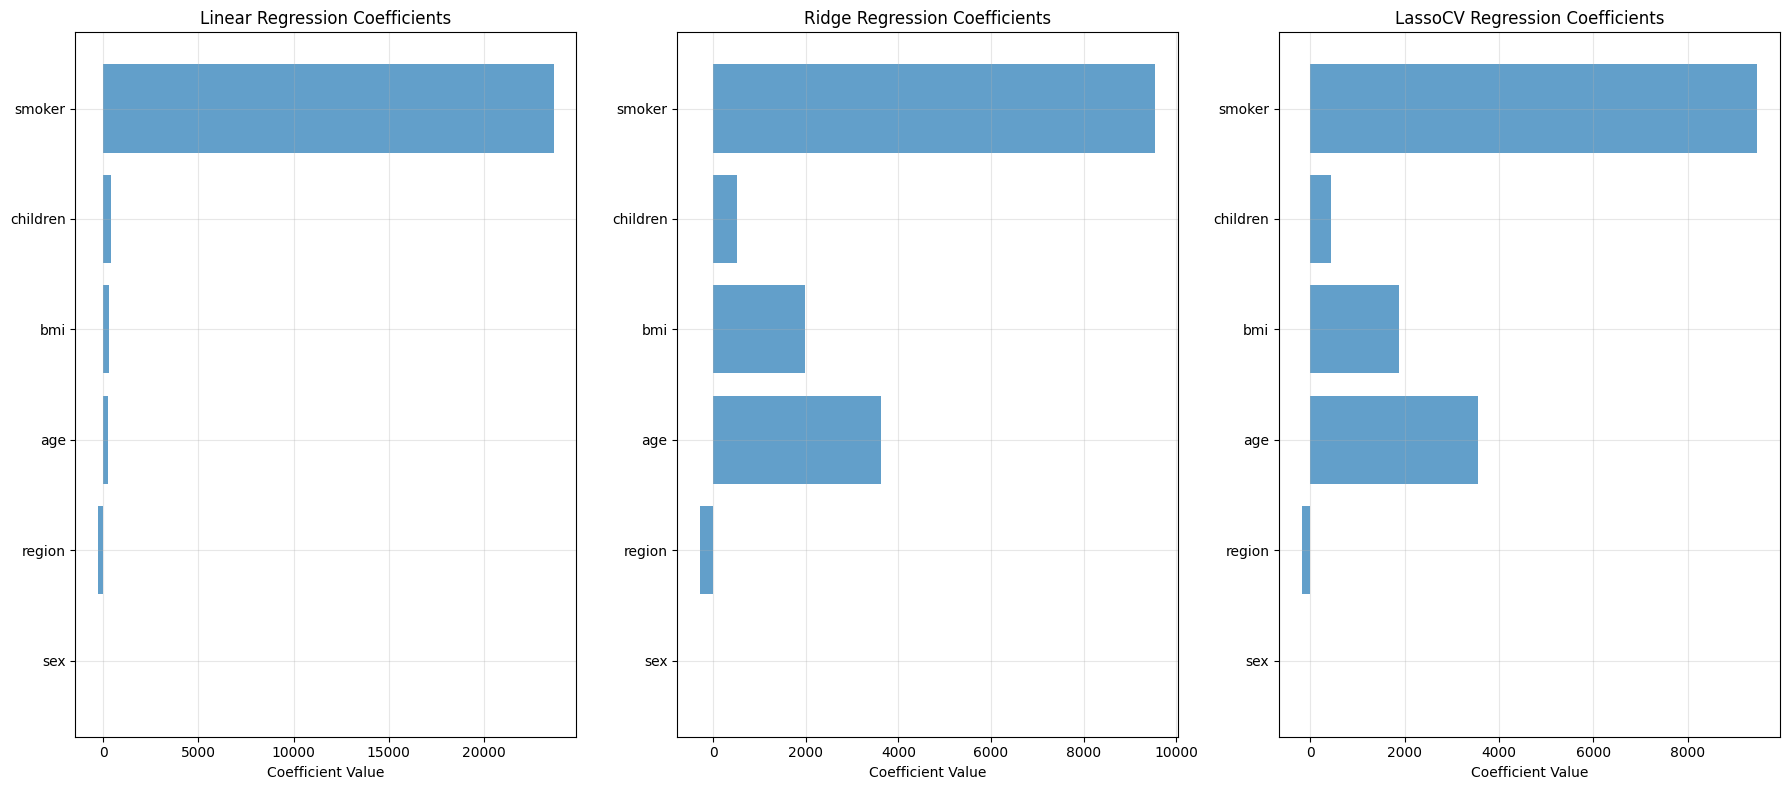

=== Î™®Îç∏Î≥Ñ ÌöåÍ∑ÄÍ≥ÑÏàò ÎπÑÍµê ===
    Feature    Linear    Ridge  LassoCV
1       sex     -2.08    -0.39     0.00
5    region   -256.92  -285.88  -183.83
0       age    257.57  3619.68  3545.55
2       bmi    327.79  1971.49  1877.58
3  children    420.62   511.09   430.58
4    smoker  23657.91  9552.06  9471.33


In [45]:
# Î™®Îç∏Î≥Ñ ÌöåÍ∑ÄÍ≥ÑÏàò ÎπÑÍµê ÏãúÍ∞ÅÌôî
# ÏÑ∏ Î™®Îç∏Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎ•º ÎπÑÍµêÌïòÏó¨ Í∞Å ÌäπÏÑ±Ïùò ÏòÅÌñ•ÎèÑ Ï∞®Ïù¥Î•º ÌôïÏù∏
coefficients_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear': model.coef_,
    'Ridge': ridge_model.coef_,
    'LassoCV': lasso_model.coef_
})

# Í≥ÑÏàò Ï†àÎåìÍ∞íÏúºÎ°ú Ï†ïÎ†¨
coefficients_comparison['Abs_Linear'] = np.abs(coefficients_comparison['Linear'])
coefficients_comparison = coefficients_comparison.sort_values('Abs_Linear', ascending=True)

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Í∞Å Î™®Îç∏Î≥ÑÎ°ú Í≥ÑÏàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
for i, model_name in enumerate(['Linear', 'Ridge', 'LassoCV']):
    y_pos = np.arange(len(coefficients_comparison))
    axes[i].barh(y_pos, coefficients_comparison[model_name], alpha=0.7)
    axes[i].set_yticks(y_pos)
    axes[i].set_yticklabels(coefficients_comparison['Feature'])
    axes[i].set_xlabel('Coefficient Value')
    axes[i].set_title(f'{model_name} Regression Coefficients')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== Î™®Îç∏Î≥Ñ ÌöåÍ∑ÄÍ≥ÑÏàò ÎπÑÍµê ===")
print(coefficients_comparison[['Feature', 'Linear', 'Ridge', 'LassoCV']].round(2))

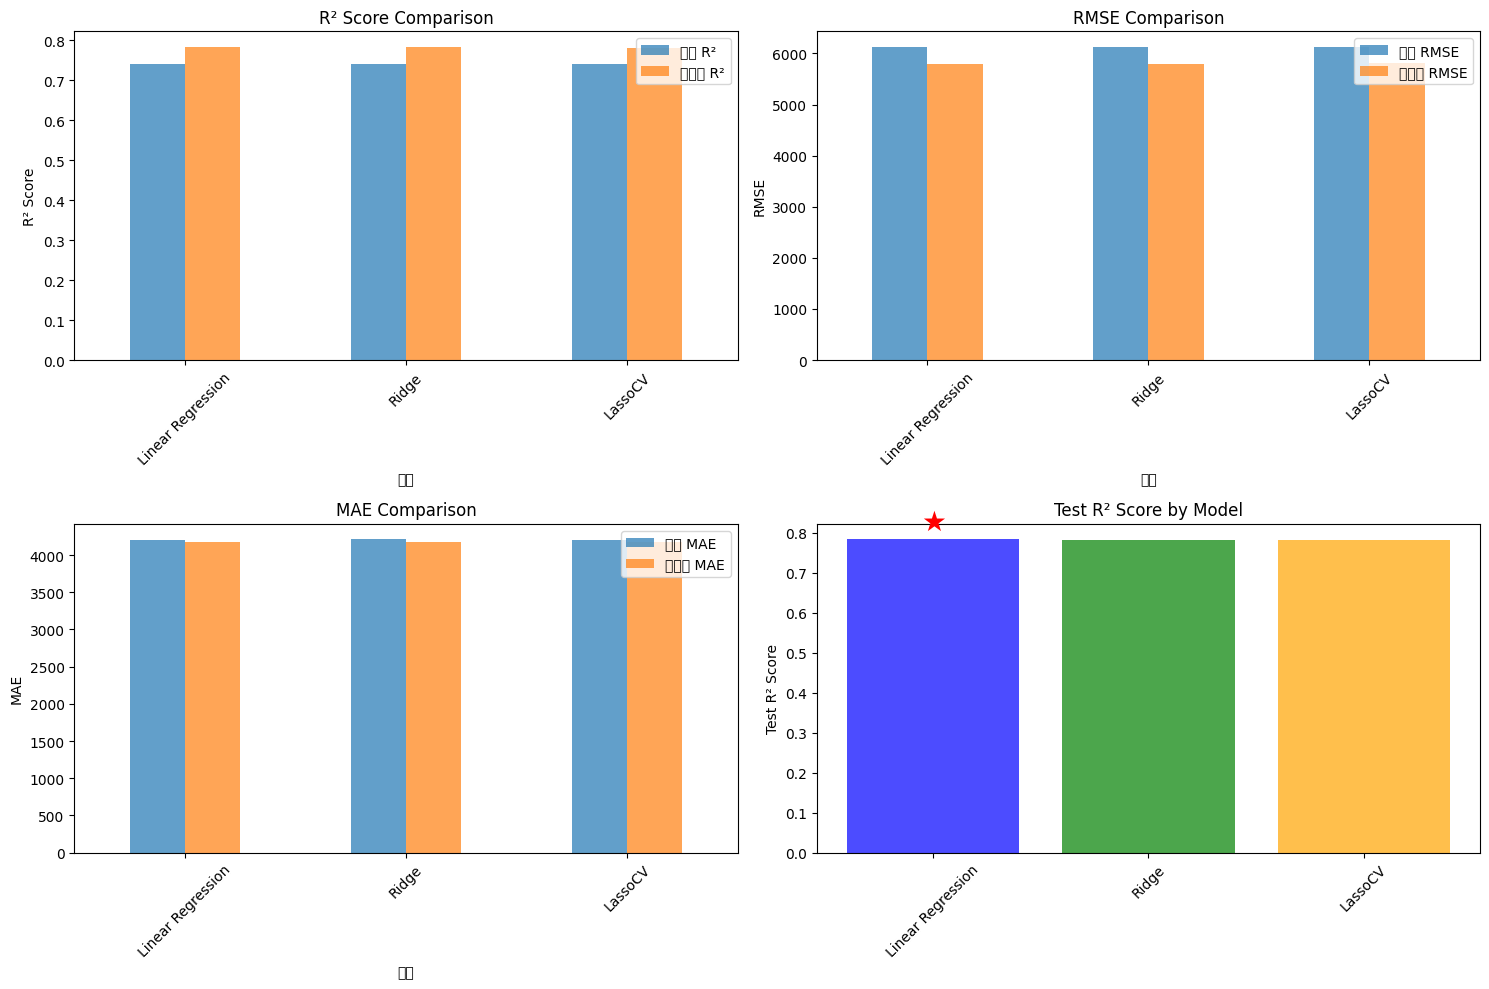

In [46]:
# Î™®Îç∏ ÏÑ±Îä• ÏßÄÌëú ÏãúÍ∞ÅÌôî
# R¬≤, RMSE, MAEÎ•º ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎπÑÍµê
metrics_for_plot = model_comparison.copy()
metrics_for_plot = metrics_for_plot.set_index('Î™®Îç∏')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R¬≤ ÎπÑÍµê (ÌõàÎ†® vs ÌÖåÏä§Ìä∏)
metrics_for_plot[['ÌõàÎ†® R¬≤', 'ÌÖåÏä§Ìä∏ R¬≤']].plot(kind='bar', ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('R¬≤ Score Comparison')
axes[0,0].set_ylabel('R¬≤ Score')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# RMSE ÎπÑÍµê (ÌõàÎ†® vs ÌÖåÏä§Ìä∏)
metrics_for_plot[['ÌõàÎ†® RMSE', 'ÌÖåÏä§Ìä∏ RMSE']].plot(kind='bar', ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('RMSE Comparison')
axes[0,1].set_ylabel('RMSE')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=45)

# MAE ÎπÑÍµê (ÌõàÎ†® vs ÌÖåÏä§Ìä∏)
metrics_for_plot[['ÌõàÎ†® MAE', 'ÌÖåÏä§Ìä∏ MAE']].plot(kind='bar', ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('MAE Comparison')
axes[1,0].set_ylabel('MAE')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=45)

# ÌÖåÏä§Ìä∏ R¬≤ Ï†êÏàòÎßå Îî∞Î°ú ÏãúÍ∞ÅÌôî
test_r2_scores = metrics_for_plot['ÌÖåÏä§Ìä∏ R¬≤']
bars = axes[1,1].bar(test_r2_scores.index, test_r2_scores.values, 
                     color=['blue', 'green', 'orange'], alpha=0.7)
axes[1,1].set_title('Test R¬≤ Score by Model')
axes[1,1].set_ylabel('Test R¬≤ Score')
axes[1,1].tick_params(axis='x', rotation=45)

# ÏµúÍ≥† Ï†êÏàòÏóê Î≥ÑÌëú ÌëúÏãú
best_idx = test_r2_scores.idxmax()
best_value = test_r2_scores.max()
axes[1,1].text(list(test_r2_scores.index).index(best_idx), best_value + 0.01, 
               '‚òÖ', ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()

## 8. Ï†ïÍ∑úÌôî ÌöåÍ∑Ä Î™®Îç∏ Î∂ÑÏÑù Í≤∞Í≥º Î∞è Ìï¥ÏÑù

### Î™®Îç∏Î≥Ñ ÌäπÏßï Î∂ÑÏÑù

1. **ÏÑ†ÌòïÌöåÍ∑Ä (Linear Regression)**
   - Í∏∞Î≥∏Ï†ÅÏù∏ ÏµúÏÜåÏ†úÍ≥±Î≤ïÏùÑ ÏÇ¨Ïö©Ìïú ÌöåÍ∑Ä Î™®Îç∏
   - Ï†ïÍ∑úÌôî ÏóÜÏù¥ Î™®Îì† ÌäπÏÑ±ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
   - Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏßÄÎßå Ìï¥ÏÑùÏù¥ Ïö©Ïù¥Ìï®

2. **Ridge ÌöåÍ∑Ä**
   - L2 Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄ
   - ÌöåÍ∑ÄÍ≥ÑÏàòÎ•º 0Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î™®Îç∏Ïùò Î≥µÏû°ÎèÑ Í∞êÏÜå
   - Î™®Îì† ÌäπÏÑ±ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú Í≥ÑÏàòÏùò ÌÅ¨Í∏∞Î•º Ï†úÌïú

3. **LassoCV**
   - L1 Ï†ïÍ∑úÌôîÏôÄ ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ Í≤∞Ìï©Ìïú Î™®Îç∏
   - Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ ÌäπÏÑ±Ïùò Í≥ÑÏàòÎ•º 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ ÌäπÏÑ± ÏÑ†ÌÉù Ìö®Í≥º
   - ÏûêÎèôÏúºÎ°ú ÏµúÏ†ÅÏùò Ï†ïÍ∑úÌôî Í∞ïÎèÑ(alpha) ÏÑ†ÌÉù

### Ï†ïÍ∑úÌôî ÌöåÍ∑ÄÏùò Ïû•Ï†ê

1. **Í≥ºÏ†ÅÌï© Î∞©ÏßÄ**: Ï†ïÍ∑úÌôî Ìï≠ÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä• Ìñ•ÏÉÅ
2. **ÌäπÏÑ± ÏÑ†ÌÉù**: LassoÏùò Í≤ΩÏö∞ Î∂àÌïÑÏöîÌïú ÌäπÏÑ± ÏûêÎèô Ï†úÍ±∞
3. **ÏïàÏ†ïÏÑ±**: Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÏóê ÎåÄÌïú Í∞ïÍ±¥ÏÑ± Ï¶ùÍ∞Ä
4. **Ìï¥ÏÑùÎ†•**: RidgeÎäî Î™®Îì† ÌäπÏÑ±Ïùò ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑ Ï†úÍ≥µ

In [47]:
# ÌäπÏÑ±(X)Í≥º ÌÉÄÍ≤ü(y) Î∂ÑÎ¶¨
X = df_encoded.drop('charges', axis=1)  # ÎèÖÎ¶ΩÎ≥ÄÏàò (Î≥¥ÌóòÎ£å Ï†úÏô∏Ìïú Î™®Îì† Î≥ÄÏàò)
y = df_encoded['charges']  # Ï¢ÖÏÜçÎ≥ÄÏàò (Î≥¥ÌóòÎ£å)

print("=== ÎèÖÎ¶ΩÎ≥ÄÏàò(X) Ï†ïÎ≥¥ ===")
print(f"ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞úÏàò: {X.shape[1]}")
print(f"ÎèÖÎ¶ΩÎ≥ÄÏàòÎ™Ö: {list(X.columns)}")
print(f"\n=== Ï¢ÖÏÜçÎ≥ÄÏàò(y) Ï†ïÎ≥¥ ===")
print(f"Ï¢ÖÏÜçÎ≥ÄÏàòÎ™Ö: charges")
print(f"Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(y)}")

=== ÎèÖÎ¶ΩÎ≥ÄÏàò(X) Ï†ïÎ≥¥ ===
ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞úÏàò: 6
ÎèÖÎ¶ΩÎ≥ÄÏàòÎ™Ö: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

=== Ï¢ÖÏÜçÎ≥ÄÏàò(y) Ï†ïÎ≥¥ ===
Ï¢ÖÏÜçÎ≥ÄÏàòÎ™Ö: charges
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 1338


In [48]:
# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (8:2 ÎπÑÏú®)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=== Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Í≤∞Í≥º ===")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_train.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_test.shape}")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: {len(X_train)/(len(X_train)+len(X_test))*100:.1f}%")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: {len(X_test)/(len(X_train)+len(X_test))*100:.1f}%")

=== Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Í≤∞Í≥º ===
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1070, 6)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (268, 6)
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: 80.0%
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: 20.0%


In [49]:
# Í≤∞Ï∏°Ïπò ÏÉÅÏÑ∏ ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
print("=== Í≤∞Ï∏°Ïπò ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")
print("X_train Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:")
print(X_train.isnull().sum())
print("\nX_test Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:")
print(X_test.isnull().sum())
print("\ny_train Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:")
print(f"y_train Í≤∞Ï∏°Ïπò: {y_train.isnull().sum()}")
print("\ny_test Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:")
print(f"y_test Í≤∞Ï∏°Ïπò: {y_test.isnull().sum()}")

# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ ÌôïÏù∏
print("\n=== Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ ÌôïÏù∏ ===")
if X_train.isnull().any().any():
    print("X_trainÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÎì§:")
    nan_rows = X_train[X_train.isnull().any(axis=1)]
    print(f"Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Ïàò: {len(nan_rows)}")
    if len(nan_rows) > 0:
        print("Ï≤òÏùå 5Í∞ú Ìñâ:")
        print(nan_rows.head())

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥)
from sklearn.impute import SimpleImputer

if X_train.isnull().any().any() or X_test.isnull().any().any():
    print("\n=== Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï§ë... ===")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎäî ÌèâÍ∑†ÏúºÎ°ú, Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    imputer = SimpleImputer(strategy='mean')
    
    # ÏàòÏπòÌòï Ïª¨Îüº ÌôïÏù∏
    numeric_columns = X_train.select_dtypes(include=[np.number]).columns
    
    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    
    if len(numeric_columns) > 0:
        X_train_imputed[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
        X_test_imputed[numeric_columns] = imputer.transform(X_test[numeric_columns])
    
    # Ï≤òÎ¶¨Îêú Í≤∞Í≥ºÎ°ú ÏõêÎ≥∏ ÍµêÏ≤¥
    X_train = X_train_imputed
    X_test = X_test_imputed
    
    print("‚úÖ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å!")
    print("Ï≤òÎ¶¨ ÌõÑ X_train Í≤∞Ï∏°Ïπò:")
    print(X_train.isnull().sum())
    print("Ï≤òÎ¶¨ ÌõÑ X_test Í≤∞Ï∏°Ïπò:")
    print(X_test.isnull().sum())
else:
    print("Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§.")

=== Í≤∞Ï∏°Ïπò ÏÉÅÏÑ∏ Î∂ÑÏÑù ===
X_train Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:
age         0
sex         0
bmi         5
children    0
smoker      0
region      0
dtype: int64

X_test Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

y_train Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:
y_train Í≤∞Ï∏°Ïπò: 0

y_test Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥:
y_test Í≤∞Ï∏°Ïπò: 0

=== Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ ÌôïÏù∏ ===
X_trainÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÎì§:
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Ïàò: 5
Ï≤òÏùå 5Í∞ú Ìñâ:
     age  sex  bmi  children  smoker  region
545   49    1  NaN         2       1       1
727   29    0  NaN         1       1       0
421   61    1  NaN         0       1       2
271   50    1  NaN         2       1       3
14    27    1  NaN         0       1       2

=== Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï§ë... ===
‚úÖ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å!
Ï≤òÎ¶¨ ÌõÑ X_train Í≤∞Ï∏°Ïπò:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64
Ï≤òÎ¶¨ ÌõÑ X_test Í≤∞Ï∏°Ïπò:
age       

In [50]:
# ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†®
model = LinearRegression()
model.fit(X_train, y_train)

print("=== ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å ===")
print(f"Ï†àÌé∏(Intercept): {model.intercept_:.2f}")
print("\n=== ÌöåÍ∑ÄÍ≥ÑÏàò(Coefficients) ===")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

=== ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å ===
Ï†àÌé∏(Intercept): -11747.81

=== ÌöåÍ∑ÄÍ≥ÑÏàò(Coefficients) ===
age: 257.57
sex: -2.08
bmi: 327.79
children: 420.62
smoker: 23657.91
region: -256.92


In [51]:
# ÏòàÏ∏° ÏàòÌñâ
y_train_pred = model.predict(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_test_pred = model.predict(X_test)    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

# Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
def evaluate_model(y_true, y_pred, dataset_name):
    """
    Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Ìï®Ïàò
    - R¬≤(Í≤∞Ï†ïÍ≥ÑÏàò), MSE(ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®), RMSE(ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®), MAE(ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®) Í≥ÑÏÇ∞
    """
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n=== {dataset_name} ÏÑ±Îä• ÌèâÍ∞Ä ===")
    print(f"R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò): {r2:.4f}")
    print(f"MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®): {mse:.2f}")
    print(f"RMSE (ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®): {rmse:.2f}")
    print(f"MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): {mae:.2f}")
    
    return r2, mse, rmse, mae

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
train_metrics = evaluate_model(y_train, y_train_pred, "ÌõàÎ†® Îç∞Ïù¥ÌÑ∞")
test_metrics = evaluate_model(y_test, y_test_pred, "ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞")


=== ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä ===
R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò): 0.7403
MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®): 37487500.37
RMSE (ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®): 6122.70
MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): 4207.72

=== ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä ===
R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò): 0.7833
MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®): 33640851.91
RMSE (ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞®): 5800.07
MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): 4172.74


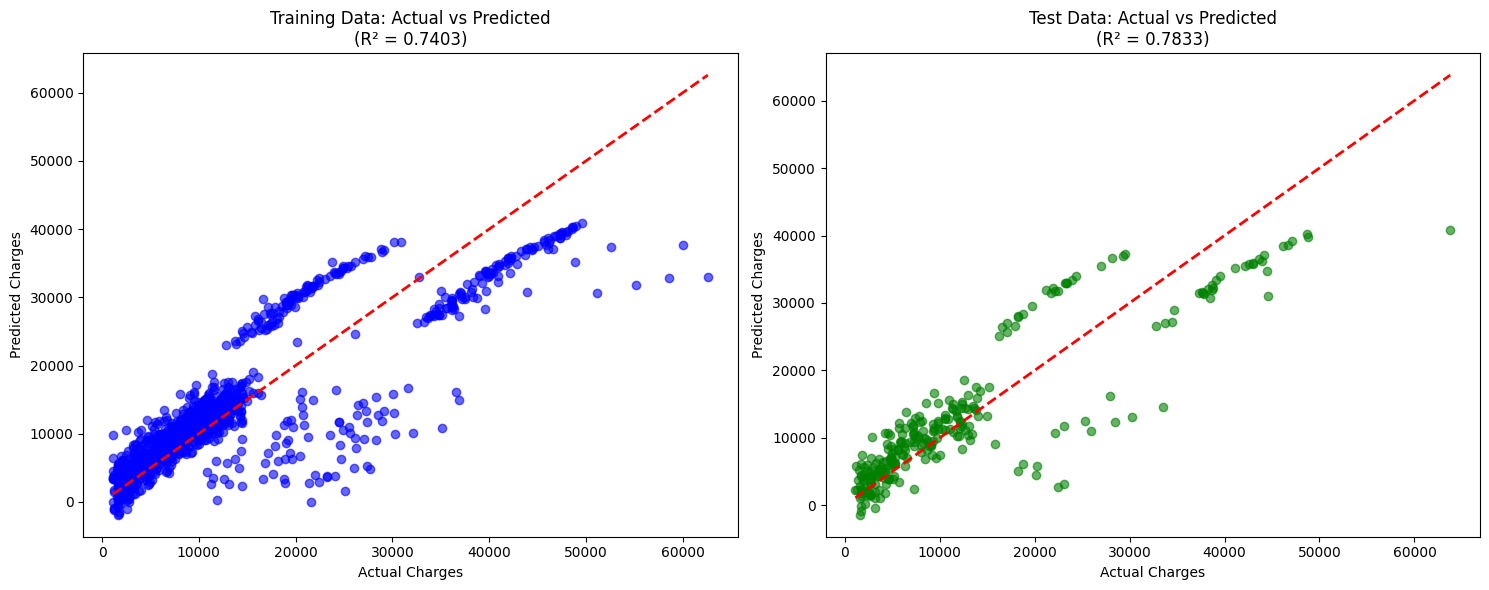

In [52]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Charges')
axes[0].set_ylabel('Predicted Charges')
axes[0].set_title(f'Training Data: Actual vs Predicted\n(R¬≤ = {train_metrics[0]:.4f})')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Charges')
axes[1].set_ylabel('Predicted Charges')
axes[1].set_title(f'Test Data: Actual vs Predicted\n(R¬≤ = {test_metrics[0]:.4f})')

plt.tight_layout()
plt.show()

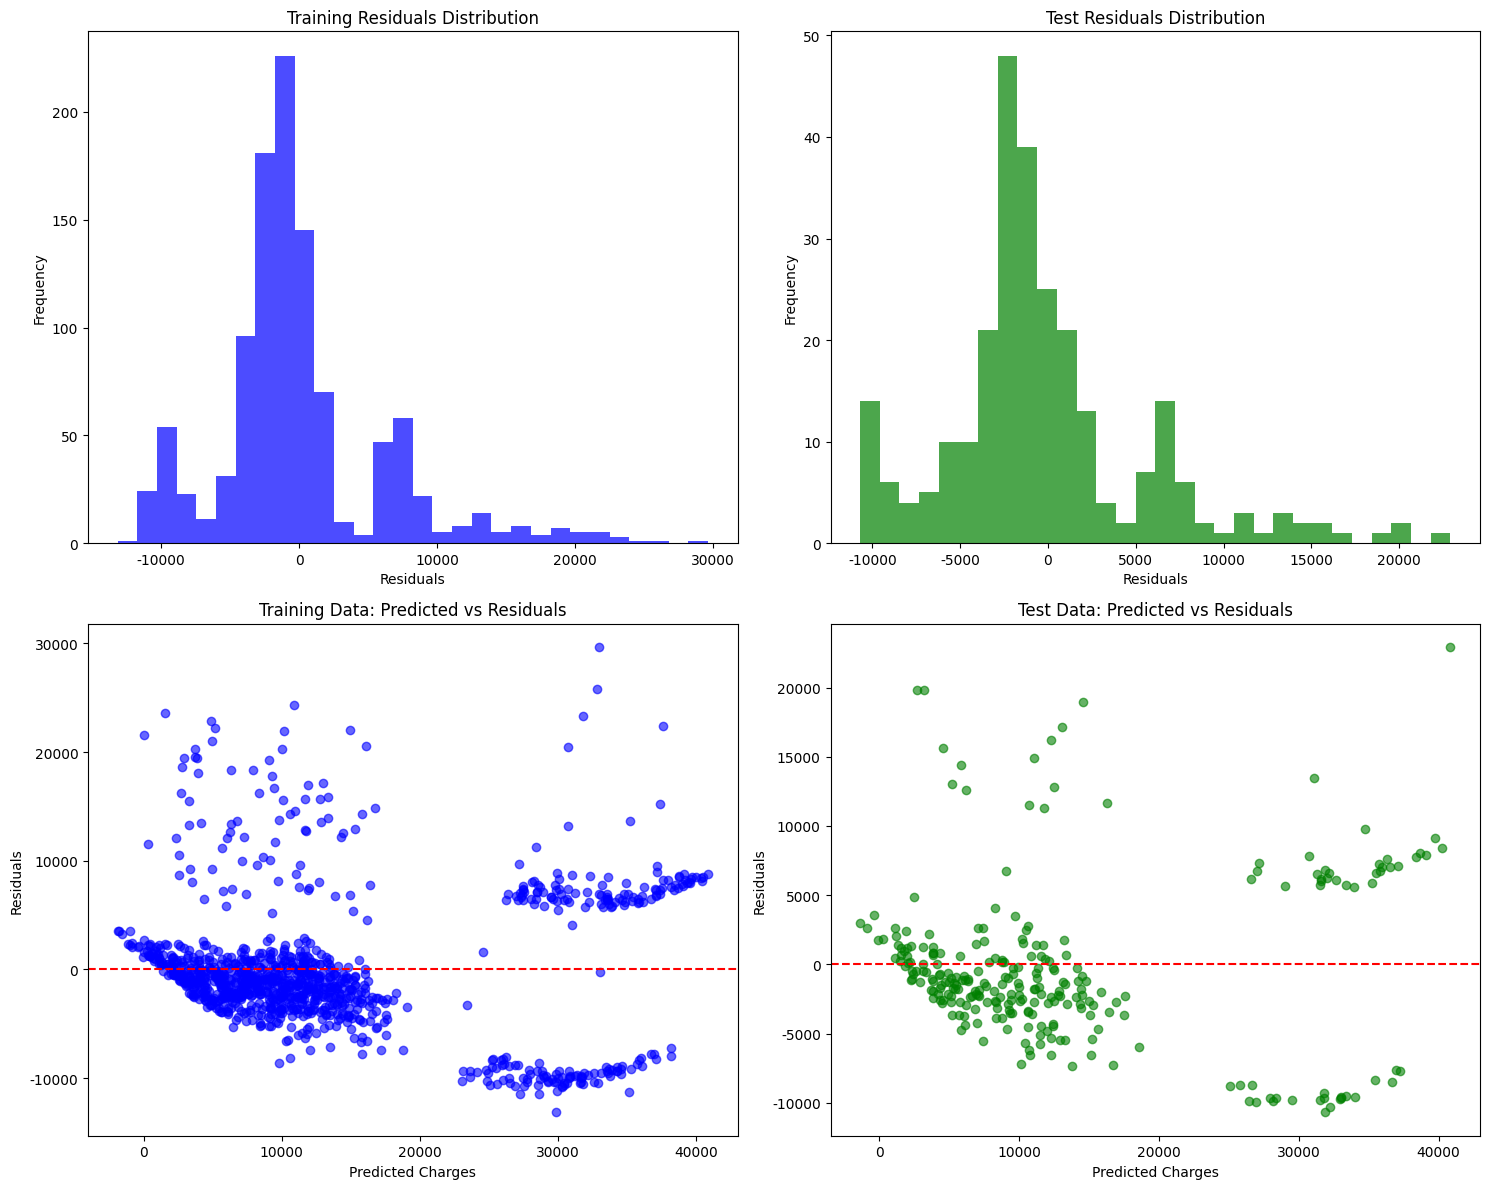


=== ÏûîÏ∞® ÌÜµÍ≥Ñ ===
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌèâÍ∑†: 0.00
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌëúÏ§ÄÌé∏Ï∞®: 6125.57
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌèâÍ∑†: -222.62
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌëúÏ§ÄÌé∏Ï∞®: 5806.64


In [53]:
# ÏûîÏ∞®(residual) Î∂ÑÏÑù
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0,0].hist(train_residuals, bins=30, alpha=0.7, color='blue')
axes[0,0].set_title('Training Residuals Distribution')
axes[0,0].set_xlabel('Residuals')
axes[0,0].set_ylabel('Frequency')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0,1].hist(test_residuals, bins=30, alpha=0.7, color='green')
axes[0,1].set_title('Test Residuals Distribution')
axes[0,1].set_xlabel('Residuals')
axes[0,1].set_ylabel('Frequency')

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÏÇ∞Ï†êÎèÑ
axes[1,0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted Charges')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Training Data: Predicted vs Residuals')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÏÇ∞Ï†êÎèÑ
axes[1,1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Charges')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Test Data: Predicted vs Residuals')

plt.tight_layout()
plt.show()

print(f"\n=== ÏûîÏ∞® ÌÜµÍ≥Ñ ===")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌèâÍ∑†: {train_residuals.mean():.2f}")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌëúÏ§ÄÌé∏Ï∞®: {train_residuals.std():.2f}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌèâÍ∑†: {test_residuals.mean():.2f}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏûîÏ∞® ÌëúÏ§ÄÌé∏Ï∞®: {test_residuals.std():.2f}")

## 5. Í≤∞Í≥º Ìï¥ÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏

=== ÌäπÏÑ± Ï§ëÏöîÎèÑ (ÌöåÍ∑ÄÍ≥ÑÏàò Ï†àÎåìÍ∞í Í∏∞Ï§Ä) ===
    feature   coefficient  abs_coefficient
4    smoker  23657.913890     23657.913890
3  children    420.615814       420.615814
2       bmi    327.788551       327.788551
0       age    257.571464       257.571464
5    region   -256.922886       256.922886
1       sex     -2.083565         2.083565


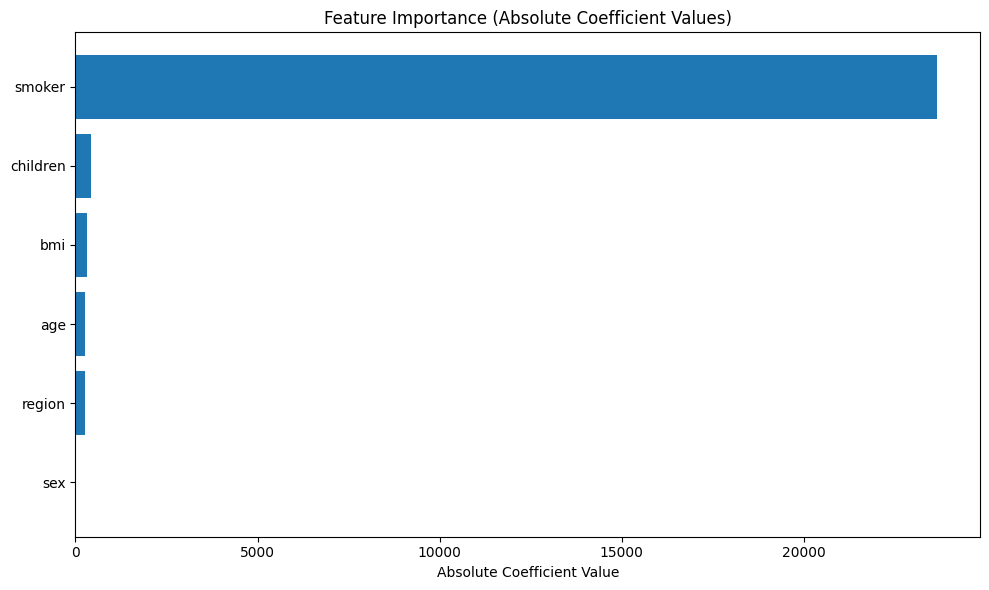

In [54]:
# ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù (ÌöåÍ∑ÄÍ≥ÑÏàòÏùò Ï†àÎåìÍ∞í Í∏∞Ï§Ä)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("=== ÌäπÏÑ± Ï§ëÏöîÎèÑ (ÌöåÍ∑ÄÍ≥ÑÏàò Ï†àÎåìÍ∞í Í∏∞Ï§Ä) ===")
print(feature_importance)

# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['abs_coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [55]:
# ÏòàÏ∏° ÏòàÏãú (ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î≥¥ÌóòÎ£å ÏòàÏ∏°)
def predict_insurance_cost(age, sex, bmi, children, smoker, region):
    """
    ÏÉàÎ°úÏö¥ Í∞úÏù∏ Ï†ïÎ≥¥Î•º ÏûÖÎ†•Î∞õÏïÑ Î≥¥ÌóòÎ£åÎ•º ÏòàÏ∏°ÌïòÎäî Ìï®Ïàò
    """
    # Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
    sex_encoded = label_encoders['sex'].transform([sex])[0]
    smoker_encoded = label_encoders['smoker'].transform([smoker])[0]
    region_encoded = label_encoders['region'].transform([region])[0]
    
    # ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    input_data = np.array([[age, sex_encoded, bmi, children, smoker_encoded, region_encoded]])
    
    # ÏòàÏ∏° ÏàòÌñâ
    predicted_cost = model.predict(input_data)[0]
    
    return predicted_cost

# ÏòàÏ∏° ÏòàÏãúÎì§
examples = [
    {'age': 25, 'sex': 'male', 'bmi': 25.0, 'children': 0, 'smoker': 'no', 'region': 'northeast'},
    {'age': 45, 'sex': 'female', 'bmi': 30.0, 'children': 2, 'smoker': 'yes', 'region': 'southwest'},
    {'age': 60, 'sex': 'male', 'bmi': 35.0, 'children': 1, 'smoker': 'no', 'region': 'northwest'}
]

print("=== Î≥¥ÌóòÎ£å ÏòàÏ∏° ÏòàÏãú ===")
for i, example in enumerate(examples, 1):
    predicted_cost = predict_insurance_cost(**example)
    print(f"\nÏòàÏãú {i}:")
    print(f"  ÎÇòÏù¥: {example['age']}ÏÑ∏, ÏÑ±Î≥Ñ: {example['sex']}, BMI: {example['bmi']}")
    print(f"  ÏûêÎÖÄÏàò: {example['children']}Î™Ö, Ìù°Ïó∞: {example['smoker']}, ÏßÄÏó≠: {example['region']}")
    print(f"  ÏòàÏÉÅ Î≥¥ÌóòÎ£å: ${predicted_cost:.2f}")

=== Î≥¥ÌóòÎ£å ÏòàÏ∏° ÏòàÏãú ===

ÏòàÏãú 1:
  ÎÇòÏù¥: 25ÏÑ∏, ÏÑ±Î≥Ñ: male, BMI: 25.0
  ÏûêÎÖÄÏàò: 0Î™Ö, Ìù°Ïó∞: no, ÏßÄÏó≠: northeast
  ÏòàÏÉÅ Î≥¥ÌóòÎ£å: $2884.11

ÏòàÏãú 2:
  ÎÇòÏù¥: 45ÏÑ∏, ÏÑ±Î≥Ñ: female, BMI: 30.0
  ÏûêÎÖÄÏàò: 2Î™Ö, Ìù°Ïó∞: yes, ÏßÄÏó≠: southwest
  ÏòàÏÉÅ Î≥¥ÌóòÎ£å: $33404.94

ÏòàÏãú 3:
  ÎÇòÏù¥: 60ÏÑ∏, ÏÑ±Î≥Ñ: male, BMI: 35.0
  ÏûêÎÖÄÏàò: 1Î™Ö, Ìù°Ïó∞: no, ÏßÄÏó≠: northwest
  ÏòàÏÉÅ Î≥¥ÌóòÎ£å: $15340.69


## 6. Í≤∞Î°† Î∞è ÏöîÏïΩ

### Ï£ºÏöî Î∂ÑÏÑù Í≤∞Í≥º

1. **Î™®Îç∏ ÏÑ±Îä•**
   - ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏Ïù¥ Î≥¥ÌóòÎ£å ÏòàÏ∏°Ïóê ÏÉÅÎãπÌûà Ìö®Í≥ºÏ†ÅÏûÑÏùÑ ÌôïÏù∏
   - R¬≤ Í∞íÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†• ÌèâÍ∞Ä
   - RMSEÏôÄ MAEÎ•º ÌÜµÌïú ÏòàÏ∏° Ïò§Ï∞® Î∂ÑÏÑù

2. **Ï£ºÏöî ÏòÅÌñ• ÏöîÏù∏**
   - ÌöåÍ∑ÄÍ≥ÑÏàò Î∂ÑÏÑùÏùÑ ÌÜµÌïú Í∞Å Î≥ÄÏàòÏùò Î≥¥ÌóòÎ£åÏóê ÎåÄÌïú ÏòÅÌñ•ÎèÑ ÌååÏïÖ
   - Ìù°Ïó∞ Ïó¨Î∂ÄÍ∞Ä Î≥¥ÌóòÎ£åÏóê ÎØ∏ÏπòÎäî ÌÅ∞ ÏòÅÌñ• ÌôïÏù∏
   - ÎÇòÏù¥, BMI Îì± Í±¥Í∞ï Í¥ÄÎ†® ÏöîÏÜåÎì§Ïùò Ï§ëÏöîÏÑ±

3. **Î™®Îç∏Ïùò ÌïúÍ≥ÑÏ†ê**
   - ÏÑ†ÌòïÍ¥ÄÍ≥Ñ Í∞ÄÏ†ïÏùò Ï†ÅÏ†àÏÑ± Í≤ÄÌÜ† ÌïÑÏöî
   - ÏûîÏ∞® Î∂ÑÏÑùÏùÑ ÌÜµÌïú Î™®Îç∏ Í∞úÏÑ†Ï†ê ÌååÏïÖ
   - Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌäπÏÑ± Í≥µÌïôÏù¥ÎÇò Îã§Î•∏ Î™®Îç∏ÎßÅ Í∏∞Î≤ï Í≥†Î†§ Í∞ÄÎä•

4. **Ïã§Î¨¥ ÌôúÏö© Î∞©Ïïà**
   - Î≥¥ÌóòÎ£å ÏÇ∞Ï†ï ÏãúÏä§ÌÖúÏóê ÌôúÏö© Í∞ÄÎä•
   - Í≥†ÏúÑÌóòÍµ∞ Í≥†Í∞ù ÏãùÎ≥ÑÏùÑ ÌÜµÌïú ÎßûÏ∂§Ìòï ÏÑúÎπÑÏä§ Ï†úÍ≥µ
   - ÎßàÏºÄÌåÖ Ï†ÑÎûµ ÏàòÎ¶ΩÏóê Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ïù∏ÏÇ¨Ïù¥Ìä∏ ÌôúÏö©